# Chapter 7: Solving Calculus Problems

## What is a Function?

標準ライブラリは数値計算する。

In [1]:
import math

math.sin(math.pi / 2)

1.0

Sympy は数学的に厳密に計算してくれる。

In [2]:
import sympy

sympy.sin(sympy.pi / 2)

1

In [3]:
from sympy import Symbol

theta = Symbol("theta")

exp = sympy.sin(theta) ** 2 + sympy.cos(theta) ** 2
exp

sin(theta)**2 + cos(theta)**2

In [4]:
sympy.simplify(exp)

1

## Assumptions in SymPy

In [5]:
x = Symbol("x", positive=True)
if x + 1 > 0:
    print("Assumption is valid")

Assumption is valid


## Finding the Limit of Functions

`Sympy.Limit` による極限計算は遅延評価される。

In [6]:
import sympy

x = sympy.Symbol("x")
expr = sympy.Limit(1 / x, x, sympy.S.Infinity)
expr

Limit(1/x, x, oo, dir='-')

In [7]:
expr.doit()

0

$\lim_{x \to 0^-} \frac{1}{x}$

In [8]:
sympy.Limit(1 / x, x, 0, dir="-").doit()

-oo

$\lim_{x \to 0^+} \frac{1}{x}$

In [9]:
sympy.Limit(1 / x, x, 0, dir="+").doit()

oo

$\lim_{x \to 0^+}\left(\frac{\sin{\left(x \right)}}{x}\right)$

In [10]:
sympy.Limit(sympy.sin(x) / x, x, 0).doit()

1

### Continuous Compound Interest

In [11]:
import sympy

n = sympy.Symbol("n")

sympy.Limit((1 + 1 / n) ** n, n, sympy.S.Infinity).doit()

E

In [12]:
n, p, r, t = sympy.symbols("n, p, r, t")

sympy.Limit(p * (1 + r / n) ** (n * t), n, sympy.S.Infinity).doit()

p*exp(r*t)

### Instantaneous Rate of Change

関数 $S(t) = 5t^2 + 2t + 8$ の微分を、定義どおりに極限値で求める。

In [13]:
from sympy import Limit, Symbol

t = Symbol("t")
St = 5 * t ** 2 + 2 * t + 8

delta_t = Symbol("delta_t")

Limit((St.subs({t: t + delta_t}) - St) / delta_t, delta_t, 0).doit()

10*t + 2

## Finding the Derivative of Functions

まずは一変数関数の微分から。

In [14]:
from sympy import Derivative, Symbol

t = Symbol("t")
St = 5 * t ** 2 + 2 * t + 8

d = Derivative(St, t)
d

Derivative(5*t**2 + 2*t + 8, t)

In [15]:
d.doit()

10*t + 2

In [16]:
d.doit().subs({t: 1})

12

In [17]:
from sympy import Derivative, Symbol

x = Symbol("x")
f = (x ** 3 + x ** 2 + x) * (x ** 2 + x)

Derivative(f, x).doit()

(2*x + 1)*(x**3 + x**2 + x) + (x**2 + x)*(3*x**2 + 2*x + 1)

三角関数も対数関数も微分できる。

In [18]:
f = sympy.sin(x)
Derivative(f, x).doit()

cos(x)

In [19]:
f = sympy.log(x)
Derivative(f, x).doit()

1/x

### Calculating Partial Derivatives

In [20]:
from sympy import Derivative, symbols

x, y = symbols("x, y")
f = 2 * x * y + x * y ** 2

Derivative(f, x).doit()

y**2 + 2*y

## Higher-Order Derivatives and Finding the Maxima and Minima

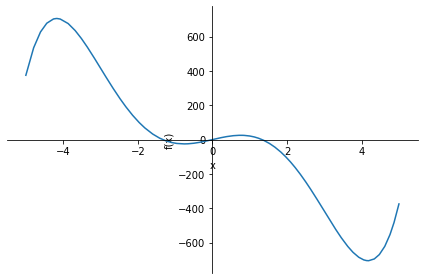

In [21]:
import sympy
from sympy.plotting import plot

x = sympy.Symbol("x")
f = x ** 5 - 30 * x ** 3 + 50 * x

plot(f, (x, -5, 5))

一階微分でクリティカルポイントを求める。

In [22]:
from sympy import Derivative, solve

d1 = Derivative(f, x).doit()
critical_points = solve(d1)
critical_points.sort()
critical_points

[-sqrt(sqrt(71) + 9),
 -sqrt(9 - sqrt(71)),
 sqrt(9 - sqrt(71)),
 sqrt(sqrt(71) + 9)]

In [23]:
A, B, C, D = critical_points

二階導関数で極大値か極小値かを判定する。

- 二階導関数が負 → 極大値
- 二階導関数が0 → 不明
- 二階導関数が正 → 極小値

In [24]:
d2 = Derivative(f, x, 2).doit()

In [25]:
print("d2(A): {0}".format(d2.subs({x: A}).evalf()))
print("d2(B): {0}".format(d2.subs({x: B}).evalf()))
print("d2(C): {0}".format(d2.subs({x: C}).evalf()))
print("d2(D): {0}".format(d2.subs({x: D}).evalf()))

d2(A): -703.493179468151
d2(B): 127.661060789073
d2(C): -127.661060789073
d2(D): 703.493179468151


したがって、A と C が極大値、B と D が極小値となる。

In [26]:
print("f(A): {0}".format(f.subs({x: A}).evalf()))
print("f(C): {0}".format(f.subs({x: C}).evalf()))
print("f(B): {0}".format(f.subs({x: B}).evalf()))
print("f(D): {0}".format(f.subs({x: D}).evalf()))

f(A): 705.959460380365
f(C): 25.0846626340294
f(B): -25.0846626340294
f(D): -705.959460380365


関数 $f$ に値を代入してみると、A で最大、D で最小となる事がわかる。

## Finding the Global Maximum Using Gradient Ascent

In [27]:
"""
Use gradient ascent to find the angle at which the projectile has maximum range for a fixed velocity, 25 m/s
"""

import math

from sympy import Derivative, Symbol, sin


# x0: the initial value of the variable at which to start the iteration
# f1x: the derivative of the function whose maximum we want to find
# x: the Symbol object corresponding to the variable for the function
def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4

    x_old = x0
    x_new = x_old + step_size * f1x.subs({x: x_old}).evalf()

    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size * f1x.subs({x: x_old}).evalf()

    return x_new


def find_max_theta(R, theta):
    # Calculate the first derivative
    R1theta = Derivative(R, theta).doit()

    theta0 = 1e-3
    return grad_ascent(theta0, R1theta, theta)


g = 9.8
# Assume initial velocity
u = 25
# Expression for range
theta = Symbol("theta")
R = u ** 2 * sin(2 * theta) / g

theta_max = find_max_theta(R, theta)
print("Theta: {0:.5f}".format(math.degrees(theta_max)))
print("Maximum Range: {0:.5f}".format(R.subs({theta: theta_max})))

Theta: 44.99782
Maximum Range: 63.77551


### A Generic Program for Gradient Ascent

In [28]:
"""
Use gradient ascent to find the maximum value of a single-variable function
"""

from sympy import Derivative, Symbol


# x0: the initial value of the variable at which to start the iteration
# f1x: the derivative of the function whose maximum we want to find
# x: the Symbol object corresponding to the variable for the function
def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4

    x_old = x0
    x_new = x_old + step_size * f1x.subs({x: x_old}).evalf()

    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size * f1x.subs({x: x_old}).evalf()

    return x_new


def find_max(x0, f, x):
    # Calculate the first derivative
    d = Derivative(f, x).doit()

    x_max = grad_ascent(x0, d, x)

    print("x_max: {0:.5f}".format(x_max))
    print("Maximum: {0:.5f}".format(f.subs({x: x_max})))

初期値 $\theta_{0} = -0.1$ で（左側から）$cos(\theta)$ の極大値を求める

In [29]:
theta = Symbol("theta")
f = sympy.cos(theta)
theta0 = -0.1
find_max(theta0, f, theta)

x_max: -0.01000
Maximum: 0.99995


初期値 $\theta_{0} = 0.1$ で（右側から）$cos(\theta)$ の極大値を求める

In [30]:
theta = Symbol("theta")
f = sympy.cos(theta)
theta0 = 0.1
find_max(theta0, f, theta)

x_max: 0.01000
Maximum: 0.99995


### A Word of Warning About the Initial Value

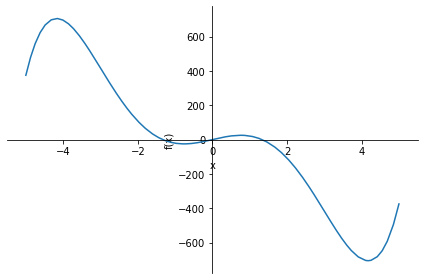

In [32]:
from sympy import Symbol
from sympy.plotting import plot

x = Symbol("x")
f = x ** 5 - 30 * x ** 3 + 50 * x

plot(f, (x, -5, 5))

左側の極大値に到達する場合

In [33]:
x0 = -5
find_max(x0, f, x)

x_max: -4.17448
Maximum: 705.95946


In [34]:
x0 = -2
find_max(x0, f, x)

x_max: -4.17445
Maximum: 705.95946


右側の極大値に到達する場合

In [35]:
x0 = 0.5
find_max(x0, f, x)

x_max: 0.75745
Maximum: 25.08466


In [36]:
x0 = 2
find_max(x0, f, x)

x_max: 0.75761
Maximum: 25.08466


### The Role of the Step Size and Epsilon

In [37]:
"""
Use gradient ascent to find the maximum value of a single-variable function. This also checks for the existence of a solution for the equation f'(x)=0.
"""


from sympy import Derivative, Symbol, solve, sympify


# x0: the initial value of the variable at which to start the iteration
# f1x: the derivative of the function whose maximum we want to find
# x: the Symbol object corresponding to the variable for the function
def grad_ascent(x0, f1x, x):
    # Check if f1x=0 has a solution
    if not solve(f1x):
        raise Exception(
            "Cannot continue, solution for {0} = 0 does not exist".format(f1x)
        )

    epsilon = 1e-6
    step_size = 1e-4

    x_old = x0
    x_new = x_old + step_size * f1x.subs({x: x_old}).evalf()

    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size * f1x.subs({x: x_old}).evalf()

    return x_new


def find_max(x0, f, x):
    # Calculate the first derivative
    d = Derivative(f, x).doit()

    x_max = grad_ascent(x0, d, x)

    print("x_max: {0:.5f}".format(x_max))
    print("Maximum: {0:.5f}".format(f.subs({x: x_max})))

In [38]:
import sympy
from sympy import Symbol

x = Symbol("x")
f = sympy.log(x)
find_max(0.1, f, x)

Exception: Cannot continue, solution for 1/x = 0 does not exist

In [40]:
x = Symbol("x")
f = -(x ** 2)
x0 = 0.1
find_max(x0, f, x)

x_max: 0.00500
Maximum: -0.00002


## Finding the Integrals of Functions

不定積分

In [41]:
from sympy import Integral, symbols

x, k = symbols("x, k")

i = Integral(k * x, x)
i

Integral(k*x, x)

In [42]:
i.doit()

k*x**2/2

定積分

In [43]:
i = Integral(k * x, (x, 0, 2))
i

Integral(k*x, (x, 0, 2))

In [44]:
i.doit()

2*k

公式サイトでは `integrate()` 関数が前面に出てる

In [45]:
import sympy

i = sympy.integrate(k * x, x)
i

k*x**2/2

In [46]:
i = sympy.integrate(k * x, (x, 0, 2))
i

2*k

In [47]:
sympy.integrate(1 / x, x)

log(x)

In [48]:
sympy.integrate(1 / sympy.sqrt(1 - x ** 2), x)

asin(x)

第二種楕円積分は、駄目だった。

In [49]:
x, k = symbols("x, k")

i = sympy.integrate(sympy.sqrt((1 - k ** 2 * x ** 2) / (1 - x ** 2)), x)
i

Integral(sqrt((-k**2*x**2 + 1)/(1 - x**2)), x)

In [50]:
sympy.simplify(i)

Integral(sqrt((k**2*x**2 - 1)/(x**2 - 1)), x)

## Probability Density Functions

In [51]:
from sympy import Symbol, exp, integrate, pi, sqrt

x = Symbol("x")
p = exp(-((x - 10) ** 2) / 2) / sqrt(2 * pi)

integrate(p, (x, 11, 12)).evalf()

0.135905121983278

In [52]:
from sympy import S

integrate(p, (x, S.NegativeInfinity, S.Infinity))

1